In [187]:
import pandas as pd
import scipy.stats as stats

In [197]:
df = pd.read_csv("USVideos.csv")

newdf = df.sort_values(by = 'views', ascending = False)
newdf.drop_duplicates(subset = 'title', keep = 'first', inplace = True)

#df.drop(df[df['Age'] < 25].index, inplace = True) 

n = newdf.drop(newdf[newdf['comments_disabled'] == True].index)

newdf['category_id'].value_counts()

one = newdf['likes'].sum() / (newdf['likes'] + newdf['dislikes']).sum()
two = newdf['comment_count'].sum() / newdf['views'].sum()
three = (newdf['likes'] + newdf['dislikes']).sum() / newdf['views'].sum()

final = [[one, two, three]]

total = pd.DataFrame(final, columns=['Total Likes to Thumb', 'Total Comments to Views', 'Total Thumbs to Views'])
total

n['comments_disabled'].count()


6345

In [124]:
newdf.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
newdf.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
newdf.loc[(df["category_id"] == 10),"category_name"] = 'Music'
newdf.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
newdf.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
newdf.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
newdf.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
newdf.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
newdf.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
newdf.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
newdf.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
newdf.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
newdf.loc[(df["category_id"] == 27),"category_name"] = 'Education'
newdf.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
newdf.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
 
#newdf['category_name'].value_counts()
nudf = pd.DataFrame(newdf['category_name'].value_counts())

indexnames = nudf[nudf['category_name'] < 150].index
nudf.drop(indexnames, inplace = True)

newdf['category_name'].value_counts()

Entertainment               1644
Music                        821
How to and Style             601
Comedy                       548
News and Politics            510
People and Blogs             502
Sport                        454
Science and Technology       391
Film and Animation           323
Education                    257
Pets and Animals             144
Gaming                       104
Cars and Vehicles             73
Travel and Events             64
Non Profits and Activism      15
Name: category_name, dtype: int64

In [157]:
newdf['Likes to Thumbs'] = newdf['likes'] / (newdf['likes'] + newdf['dislikes'])

newdf['Comments to Views'] = newdf['comment_count'] / newdf['views']

newdf['thumbs to views'] = (newdf['likes'] + newdf['dislikes']) / newdf['views']

dff = newdf.groupby('category_name').mean()

ratiodf = dff[['Likes to Thumbs' , 'Comments to Views', "thumbs to views"]]
ratiodf
#final = pd.concat([nudf, ratiodf], axis = 1, sort = False)
#final

# da = newdf.groupby('category_name')['dislikes'].max()
# da = pd.DataFrame(da)
# da
newdf['comments_disabled'].value_counts()

False    6345
True      110
Name: comments_disabled, dtype: int64

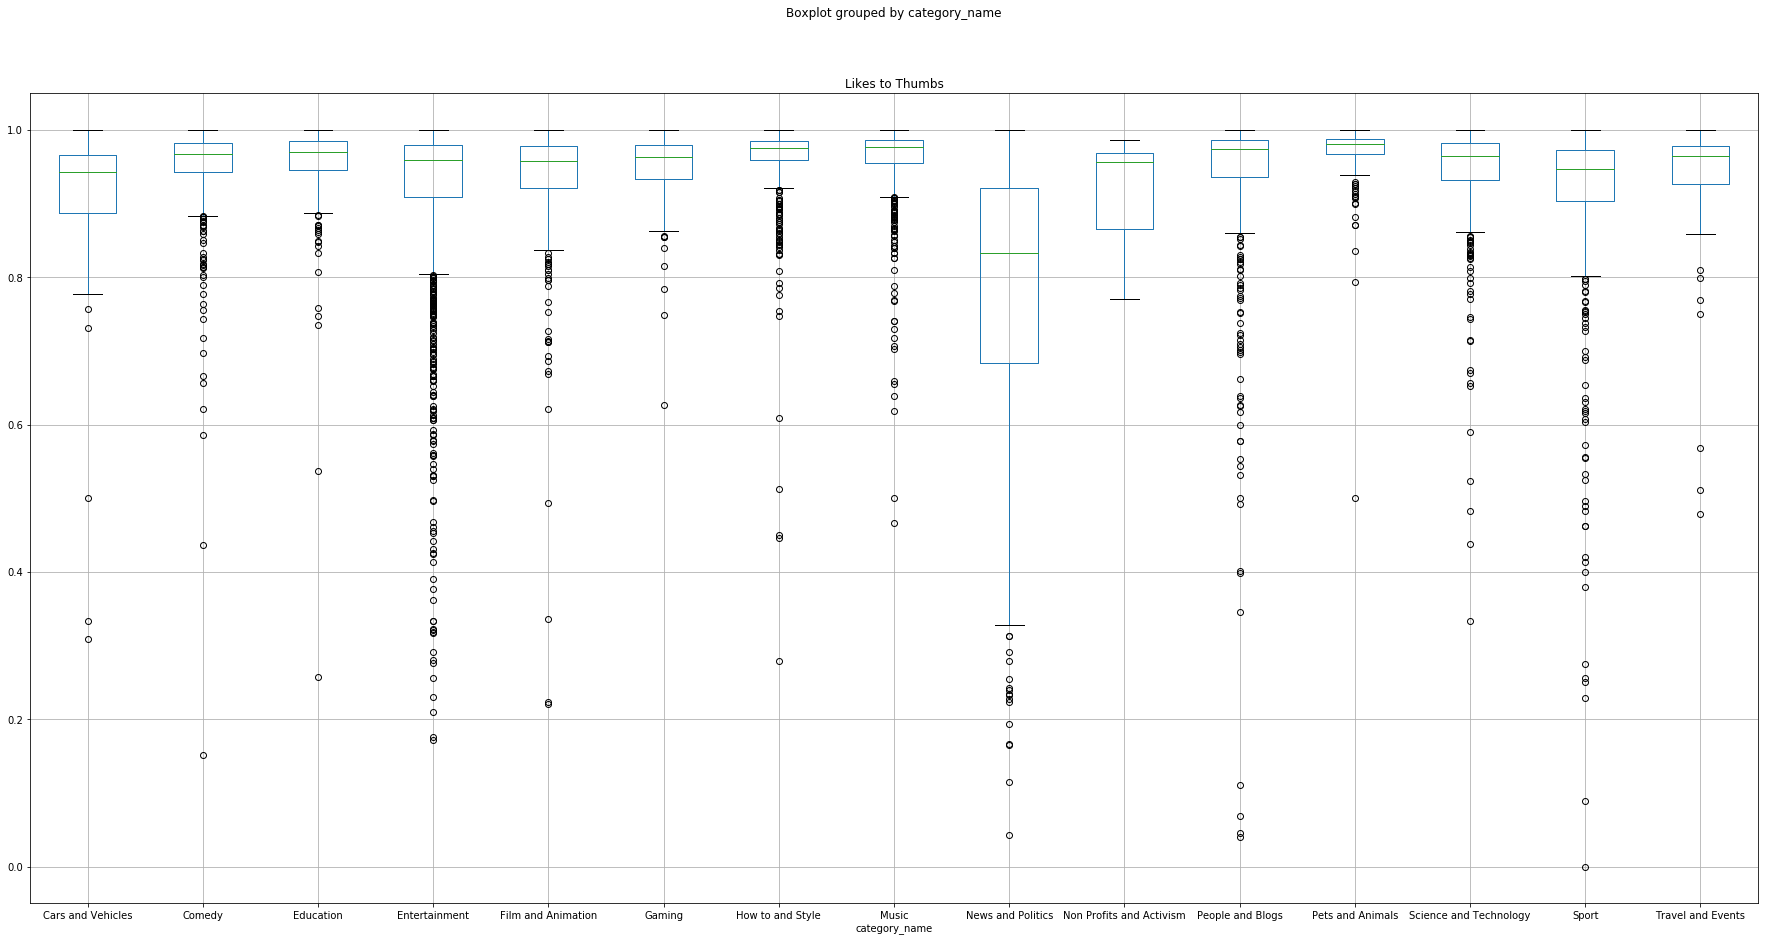

In [130]:
newdf.boxplot("Likes to Thumbs", by="category_name", figsize=(30 , 15))


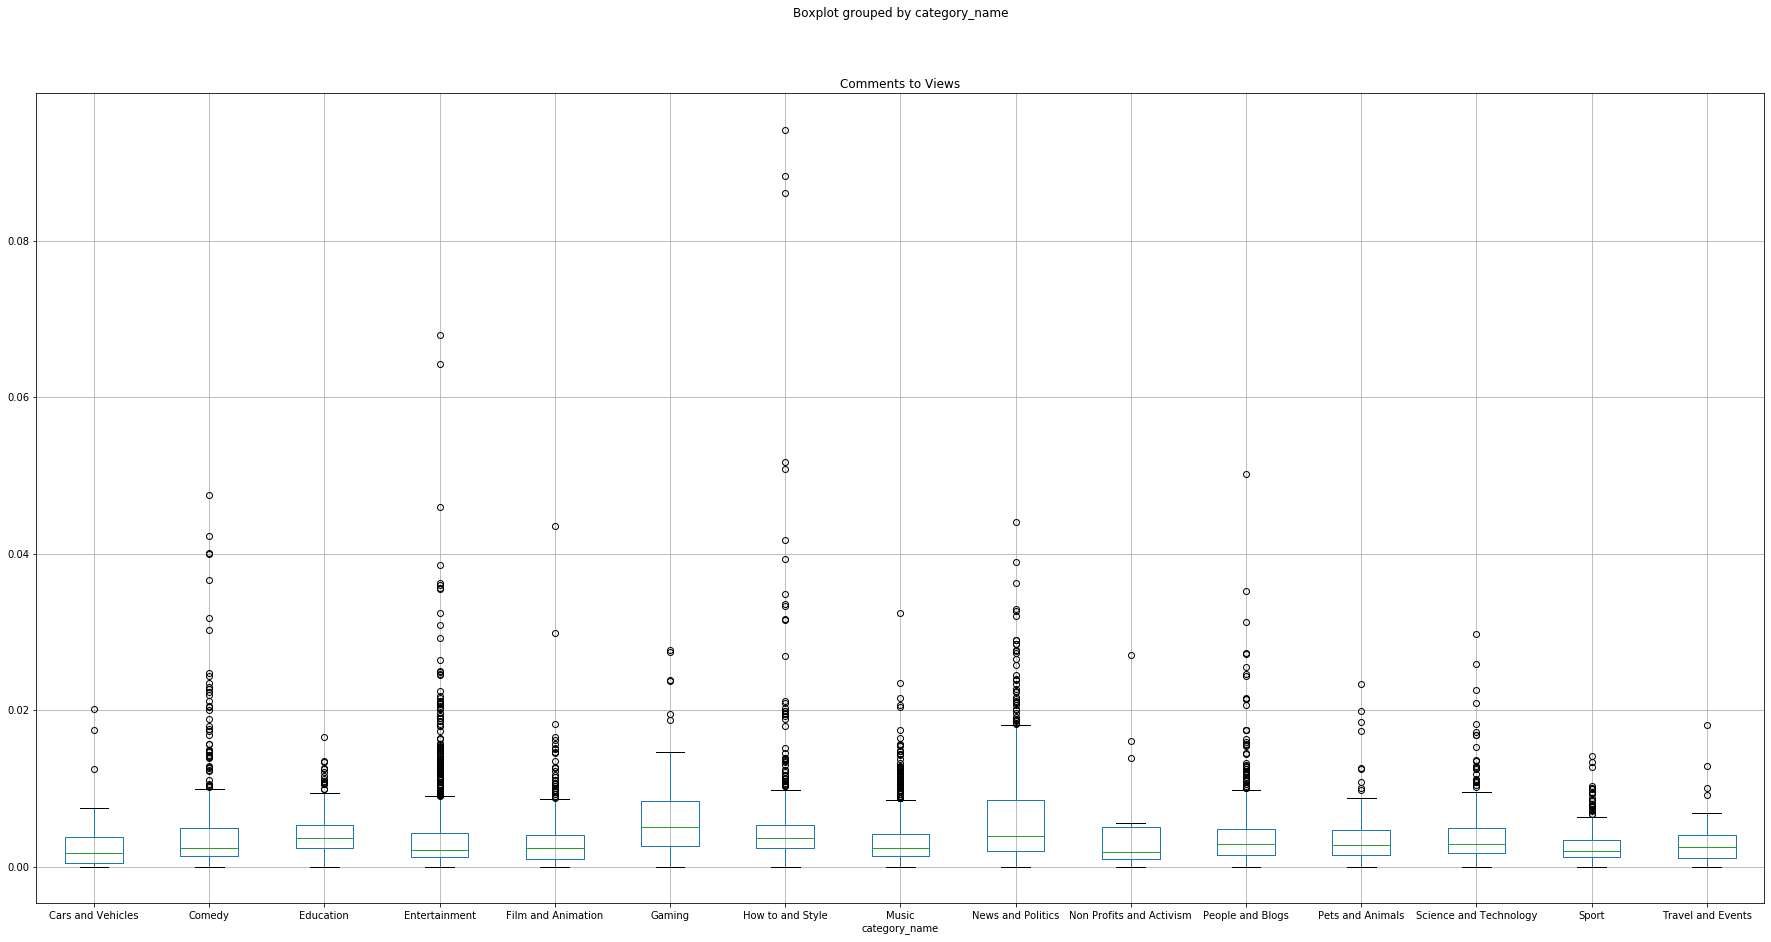

In [131]:
newdf.boxplot("Comments to Views", by="category_name", figsize=(30, 15))


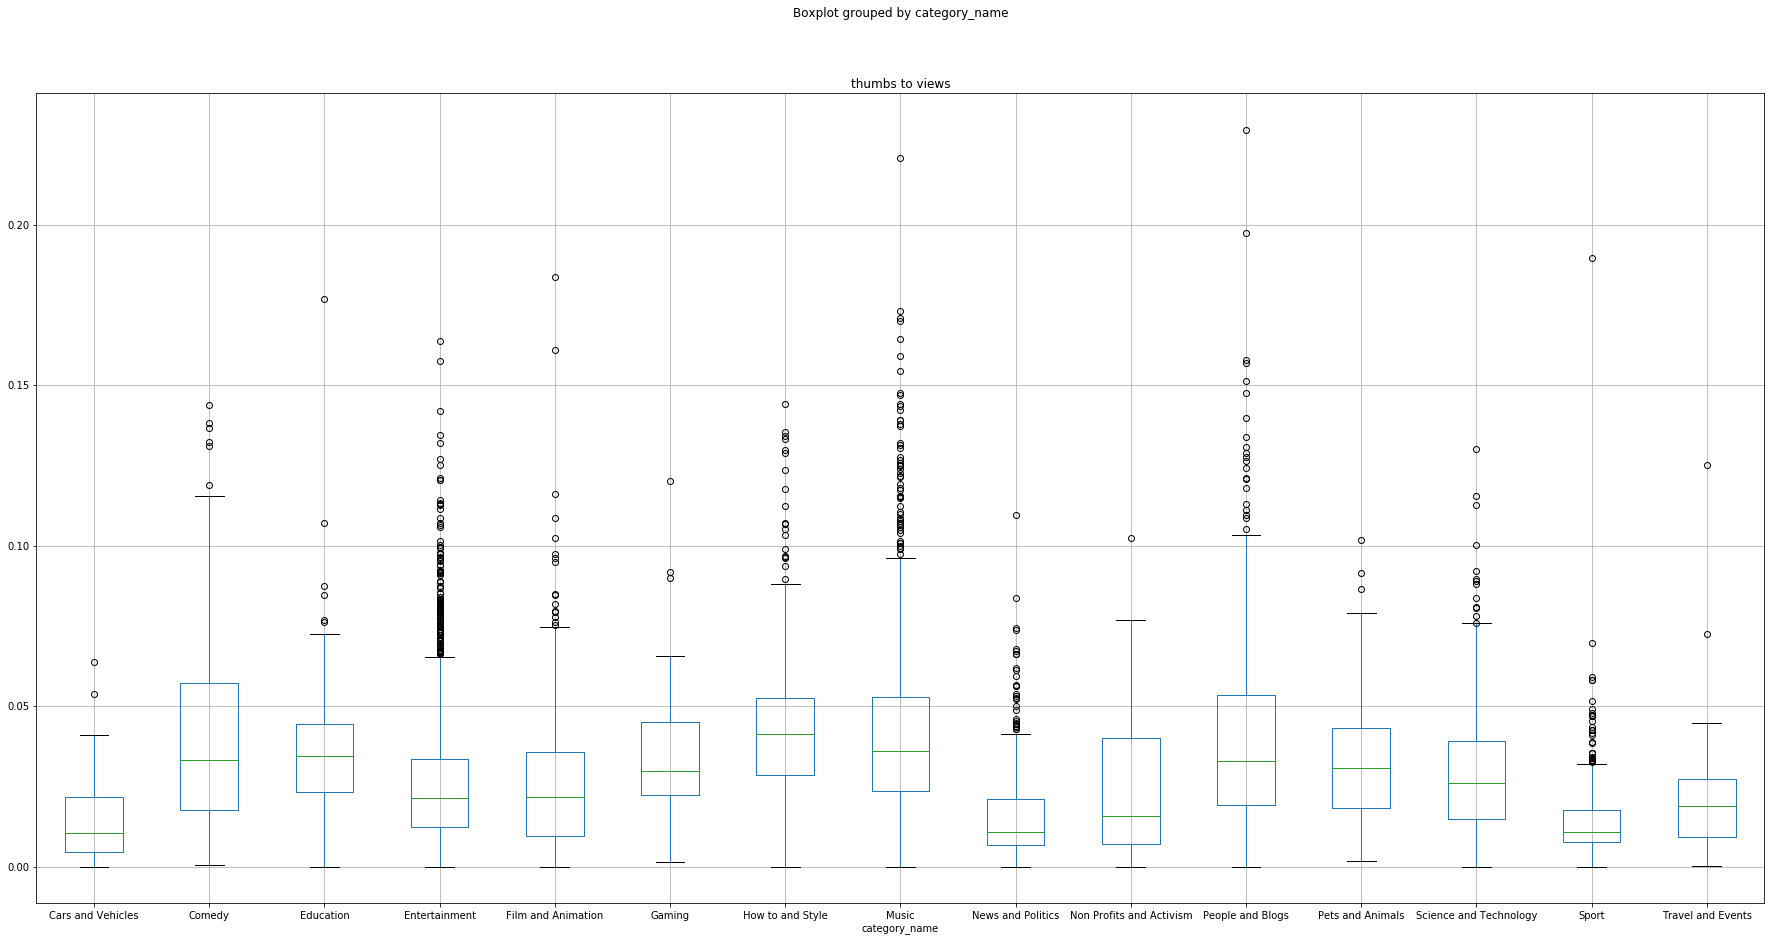

In [132]:
newdf.boxplot("thumbs to views", by="category_name", figsize=(30, 15))

In [117]:
group1 = newdf[newdf["category_name"] == 'Film and Animation']["thumbs to views"]
group2 = newdf[newdf["category_name"] == 'Cars and Vehicles']["thumbs to views"]
group3 = newdf[newdf["category_name"] == 'Sport']["thumbs to views"]
group4 = newdf[newdf["category_name"] == 'Pets and Animals']["thumbs to views"]
group5 = newdf[newdf["category_name"] == 'Sport']["thumbs to views"]
group6 = newdf[newdf["category_name"] == 'Travel and Events']["thumbs to views"]
group7 = newdf[newdf["category_name"] == 'Gaming']["thumbs to views"]
group8 = newdf[newdf["category_name"] == 'People and Blogs']["thumbs to views"]
group9 = newdf[newdf["category_name"] == 'Comedy']["thumbs to views"]
group10 = newdf[newdf["category_name"] == 'Entertainment']["thumbs to views"]
group11 = newdf[newdf["category_name"] == 'News and Politics']["thumbs to views"]
group12 = newdf[newdf["category_name"] == 'How to and Style']["thumbs to views"]
group13 = newdf[newdf["category_name"] == 'Education']["thumbs to views"]
group14 = newdf[newdf["category_name"] == 'Science and Technology']["thumbs to views"]
group15 = newdf[newdf["category_name"] == 'Non Profits and Activism']["thumbs to views"]

group1

39948    0.017140
2982     0.012728
20362    0.013420
34746    0.013992
34714    0.017991
           ...   
15392    0.003126
12956    0.012448
12987    0.000000
12492    0.000000
11357    0.001848
Name: thumbs to views, Length: 323, dtype: float64

In [116]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9,
               group10, group11, group12, group13, group14, group15)

F_onewayResult(statistic=87.62643961477582, pvalue=5.972763009599596e-230)